## Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 


## Objective

To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.


## Data Description

The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below. 

**Data Dictionary** 

- Location: Location in which the car is being sold or is available for purchase (cities)
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner_Type: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh = 100,000 INR)
- Price: The price of the used car in INR Lakhs
- Brand: The brand name of the car
- Model: The model name of the car

## Let's start coding!

### Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
import datetime as dt

# to split the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# to build linear regression_model
# from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [2]:
# loading the dataset
data = pd.read_csv("used_cars_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7251 entries, 0 to 7250
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7251 non-null   int64  
 1   Location           7251 non-null   object 
 2   Year               7251 non-null   int64  
 3   Kilometers_Driven  7251 non-null   int64  
 4   Fuel_Type          7251 non-null   object 
 5   Transmission       7251 non-null   object 
 6   Owner_Type         7251 non-null   object 
 7   Seats              7198 non-null   float64
 8   Price              6018 non-null   float64
 9   mileage            7168 non-null   float64
 10  engine             7205 non-null   float64
 11  power              7076 non-null   float64
 12  new_price          1006 non-null   float64
 13  Brand              7251 non-null   object 
 14  Model              7251 non-null   object 
dtypes: float64(6), int64(3), object(6)
memory usage: 849.9+ KB


In [4]:
data.head()

,id,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,mileage,engine,power,new_price,Brand,Model
0,0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,26.60,998.0,58.16,NaN,maruti,wagon
1,1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,19.67,1582.0,126.20,NaN,hyundai,creta
2,2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,18.20,1199.0,88.70,8.61,honda,jazz
3,3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,20.77,1248.0,88.76,NaN,maruti,ertiga
4,4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.20,1968.0,140.80,NaN,audi,a4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7251 entries, 0 to 7250
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7251 non-null   int64  
 1   Location           7251 non-null   object 
 2   Year               7251 non-null   int64  
 3   Kilometers_Driven  7251 non-null   int64  
 4   Fuel_Type          7251 non-null   object 
 5   Transmission       7251 non-null   object 
 6   Owner_Type         7251 non-null   object 
 7   Seats              7198 non-null   float64
 8   Price              6018 non-null   float64
 9   mileage            7168 non-null   float64
 10  engine             7205 non-null   float64
 11  power              7076 non-null   float64
 12  new_price          1006 non-null   float64
 13  Brand              7251 non-null   object 
 14  Model              7251 non-null   object 
dtypes: float64(6), int64(3), object(6)
memory usage: 849.9+ KB


In [6]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 7251 rows and 15 columns.


In [7]:
# let's create a copy of the data to avoid any changes to original data
df = data.copy()

In [8]:
# checking for duplicate values
df.duplicated().sum()

0

In [9]:
df.describe()

,id,Year,Kilometers_Driven,Seats,Price,mileage,engine,power,new_price
count,7251.000000,7251.000000,7251.000000,7198.000000,6018.000000,7168.000000,7205.000000,7076.000000,1006.000000
mean,3625.678941,2013.365329,57811.654255,5.280495,9.470243,18.347047,1616.399028,112.743949,22.779692
std,2093.705330,3.254350,37502.061260,0.809376,11.165926,4.158365,595.145170,53.473203,27.759344
min,0.000000,1996.000000,171.000000,2.000000,0.440000,6.400000,72.000000,34.200000,3.910000
25%,1812.500000,2011.000000,34000.000000,5.000000,3.500000,15.300000,1198.000000,75.000000,7.885000
50%,3626.000000,2014.000000,53416.000000,5.000000,5.640000,18.200000,1493.000000,94.000000,11.570000
75%,5438.500000,2016.000000,73000.000000,5.000000,9.950000,21.100000,1968.000000,138.100000,26.042500
max,7251.000000,2019.000000,775000.000000,10.000000,160.000000,33.540000,5998.000000,616.000000,375.000000


In [10]:
df.Year.unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998,
       1996], dtype=int64)

**Before we start exploring the data further, let's quickly check the missingness in the data.**

In [11]:
dt.datetime.now().year

2023

In [12]:
currentyr = dt.datetime.now().year

In [13]:
df["age"] = currentyr - df["Year"]

In [14]:
df.head(2)

,id,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,mileage,engine,power,new_price,Brand,Model,age
0,0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,26.60,998.0,58.16,NaN,maruti,wagon,13
1,1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,19.67,1582.0,126.20,NaN,hyundai,creta,8


In [15]:
df.drop(["id", "Year"], axis=1, inplace=True)

In [16]:
df.dtypes[df.dtypes == "object"].index

Index(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand',
       'Model'],
      dtype='object')

In [17]:
object_cols = df.dtypes[df.dtypes == "object"].index

In [18]:
object_cols

Index(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand',
       'Model'],
      dtype='object')

In [19]:
for column in object_cols:
    print("Categories in",column,"are",df[column].unique())
    print(df[column].nunique()," values exist")
    print("********************")

Categories in Location are ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
11  values exist
********************
Categories in Fuel_Type are ['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
5  values exist
********************
Categories in Transmission are ['Manual' 'Automatic']
2  values exist
********************
Categories in Owner_Type are ['First' 'Second' 'Fourth & Above' 'Third']
4  values exist
********************
Categories in Brand are ['maruti' 'hyundai' 'honda' 'audi' 'nissan' 'toyota' 'volkswagen' 'tata'
 'land' 'mitsubishi' 'renault' 'mercedes-benz' 'bmw' 'mahindra' 'ford'
 'porsche' 'datsun' 'jaguar' 'volvo' 'chevrolet' 'skoda' 'mini' 'fiat'
 'jeep' 'smart' 'ambassador' 'isuzu' 'force' 'bentley' 'lamborghini'
 'hindustan' 'opelcorsa']
32  values exist
********************
Categories in Model are ['wagon' 'creta' 'jazz' 'ertiga' 'a4' 'eon' 'micra' 'innova' 'vento'
 'indica' 'ciaz' 'city' 'swift' 'rover' 'pajero'

In [20]:
## 5 times the number of rows than columns

In [21]:
# looking at value counts for non-numeric features

n = 15  # defining this up here so it's easy to change later

for colname in object_cols:
    val_counts = df[colname].value_counts(normalize=False,dropna=False)  # will also show the NA counts
    print(val_counts[:n])

    if len(val_counts) > n:
        print(f"Only displaying first {n} of {len(val_counts)} values.")
    print("-" * 50, "\n")  # just for more space in between

Mumbai        948
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       590
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
-------------------------------------------------- 

Diesel      3851
Petrol      3324
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
-------------------------------------------------- 

Manual       5203
Automatic    2048
Name: Transmission, dtype: int64
-------------------------------------------------- 

First             5950
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64
-------------------------------------------------- 

maruti           1444
hyundai          1340
honda             742
toyota            507
mercedes-benz     380
volkswagen        374
ford              351
mahindra          331
bmw               311
audi              285
tata              228
skoda       

- We had checked cars of different `Fuel_Type` earlier, but we did not encounter the 2 electric cars. Let us check why.

In [22]:
df = df[df.Fuel_Type.isin(["Diesel", "Petrol"])]

In [23]:
df['Fuel_Type'].unique()

array(['Diesel', 'Petrol'], dtype=object)

## Data Preprocessing (contd.)

### Missing Value Treatment

In [24]:
# let's check again for missing values
df.isnull().sum()

Location                0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                  53
Price                1225
mileage                81
engine                 46
power                 174
new_price            6180
Brand                   0
Model                   0
age                     0
dtype: int64

In [25]:
df.shape

(7175, 14)

In [26]:
df = df[~df['Price'].isnull()]

**Let's look at a few rows where number of seats is missing.**

In [27]:
df[df["Seats"].isnull()]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,mileage,engine,power,new_price,Brand,Model,age
194,Ahmedabad,60006,Petrol,Manual,First,NaN,2.95,NaN,NaN,NaN,NaN,honda,city,16
208,Kolkata,42001,Petrol,Manual,First,NaN,2.11,16.10,NaN,NaN,NaN,maruti,swift,13
229,Bangalore,70436,Diesel,Manual,First,NaN,3.60,NaN,1498.0,99.0,NaN,ford,figo,8
733,Chennai,97800,Petrol,Manual,Third,NaN,1.75,16.10,NaN,NaN,NaN,maruti,swift,17
749,Mumbai,55001,Diesel,Automatic,Second,NaN,26.50,NaN,NaN,NaN,NaN,land,rover,15
1294,Delhi,55005,Petrol,Manual,First,NaN,3.20,12.80,NaN,NaN,NaN,honda,city,14
1327,Hyderabad,50295,Petrol,Manual,First,NaN,5.80,16.10,NaN,NaN,NaN,maruti,swift,8
1385,Pune,115000,Petrol,Manual,Second,NaN,1.50,NaN,NaN,NaN,NaN,honda,city,19
1460,Coimbatore,69078,Petrol,Manual,First,NaN,40.88,NaN,NaN,NaN,NaN,land,rover,15
1917,Jaipur,88000,Petrol,Manual,Second,NaN,1.70,13.00,1493.0,100.0,NaN,honda,city,18


**We'll impute these missing values one-by-one by taking the median number of seats for the particular car using the `Brand` and `Model`.**

In [28]:
# imputing missing values in Seats
df["Seats"] = df.groupby(["Brand", "Model"])["Seats"].transform(
    lambda x: x.fillna(x.median())
)

In [29]:
# Checking missing values in Seats
df[df["Seats"].isnull()]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,mileage,engine,power,new_price,Brand,Model,age
2368,Chennai,56000,Petrol,Manual,Second,NaN,1.50,19.5,1061.0,NaN,NaN,maruti,estilo,15
3881,Kolkata,40000,Petrol,Manual,Second,NaN,2.50,19.5,1061.0,NaN,NaN,maruti,estilo,13
5892,Chennai,51000,Petrol,Manual,Second,NaN,1.75,19.5,1061.0,NaN,NaN,maruti,estilo,15


# Clean dataset
This is to create notes

* Maruti Estilo can accommodate 5 people.

In [30]:
df["Seats"] = df["Seats"].fillna(5.0)

**We will use a similar method to fill missing values for the `Mileage`, `engine_num`, `power_num` columns.**

In [31]:
cols_list = ["mileage", "engine", "power"]

for col in cols_list:
    df[col] = df.groupby(["Brand", "Model"])[col].transform(
        lambda x: x.fillna(x.median())
    )

df.isnull().sum()

Location                0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                   0
Price                   0
mileage                 7
engine                  0
power                  11
new_price            5136
Brand                   0
Model                   0
age                     0
dtype: int64

* There are still some missing values in `Mileage`, `power_num`, and `new_price_num`.
* There are a few car brands and models in our dataset that do not contain the new price information at all.
* We'll impute these missing values one-by-one by taking the median number of seats for the particular car using the `Brand`.

In [32]:
cols_list = ["mileage", "power"]

for col in cols_list:
    df[col] = df.groupby(["Brand"])[col].transform(lambda x: x.fillna(x.median()))

df.isnull().sum()

Location                0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                   0
Price                   0
mileage                 1
engine                  0
power                   1
new_price            5136
Brand                   0
Model                   0
age                     0
dtype: int64

In [33]:
df[df.mileage.isnull()]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,mileage,engine,power,new_price,Brand,Model,age
915,Pune,103000,Diesel,Automatic,Second,2.0,3.0,NaN,799.0,NaN,NaN,smart,fortwo,15


In [34]:
df[df['power'].isnull()]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,mileage,engine,power,new_price,Brand,Model,age
915,Pune,103000,Diesel,Automatic,Second,2.0,3.0,NaN,799.0,NaN,NaN,smart,fortwo,15


* There are still some missing values in `power_num` and `new_price_num`.
* We'll impute these missing values using the median of the data.

In [35]:
cols_list = ["power", "mileage"]

for col in cols_list:
    df[col] = df[col].fillna(df[col].median())

df.isnull().sum()

Location                0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                   0
Price                   0
mileage                 0
engine                  0
power                   0
new_price            5136
Brand                   0
Model                   0
age                     0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5950 entries, 1 to 6017
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5950 non-null   object 
 1   Kilometers_Driven  5950 non-null   int64  
 2   Fuel_Type          5950 non-null   object 
 3   Transmission       5950 non-null   object 
 4   Owner_Type         5950 non-null   object 
 5   Seats              5950 non-null   float64
 6   Price              5950 non-null   float64
 7   mileage            5950 non-null   float64
 8   engine             5950 non-null   float64
 9   power              5950 non-null   float64
 10  new_price          814 non-null    float64
 11  Brand              5950 non-null   object 
 12  Model              5950 non-null   object 
 13  age                5950 non-null   int64  
dtypes: float64(6), int64(2), object(6)
memory usage: 697.3+ KB


In [37]:
df.corr()

,Kilometers_Driven,Seats,Price,mileage,engine,power,new_price,age
Kilometers_Driven,1.000000,0.213481,-0.168788,-0.144525,0.154460,-0.003714,-0.003443,0.448309
Seats,0.213481,1.000000,0.051880,-0.343618,0.397297,0.095213,-0.013832,-0.014744
Price,-0.168788,0.051880,1.000000,-0.334259,0.658094,0.773547,0.871256,-0.306304
mileage,-0.144525,-0.343618,-0.334259,1.000000,-0.643275,-0.545128,-0.377185,-0.301426
engine,0.154460,0.397297,0.658094,-0.643275,1.000000,0.864869,0.723666,0.049255
power,-0.003714,0.095213,0.773547,-0.545128,0.864869,1.000000,0.871094,-0.032609
new_price,-0.003443,-0.013832,0.871256,-0.377185,0.723666,0.871094,1.000000,0.025263
age,0.448309,-0.014744,-0.306304,-0.301426,0.049255,-0.032609,0.025263,1.000000


<AxesSubplot:>

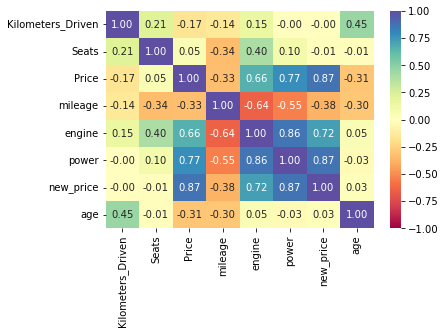

In [38]:
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)

In [39]:
df.isnull().sum()

Location                0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                   0
Price                   0
mileage                 0
engine                  0
power                   0
new_price            5136
Brand                   0
Model                   0
age                     0
dtype: int64

In [40]:
del df['new_price']

In [41]:
df.isnull().sum()

Location             0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
Price                0
mileage              0
engine               0
power                0
Brand                0
Model                0
age                  0
dtype: int64

In [42]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="green"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="yellow", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### `Price`

In [43]:
df.columns

Index(['Location', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'Price', 'mileage', 'engine', 'power', 'Brand',
       'Model', 'age'],
      dtype='object')

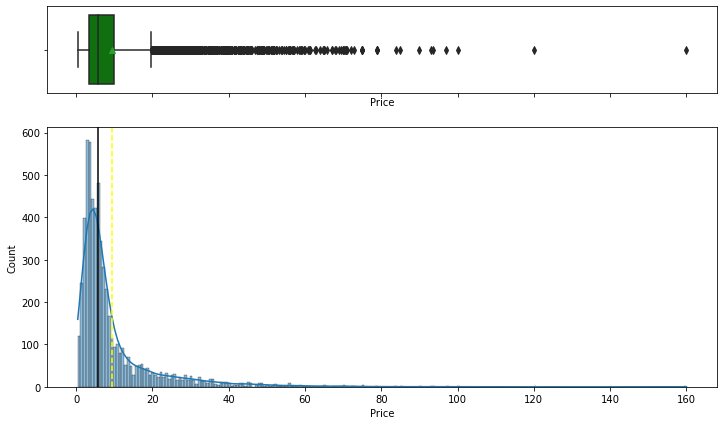

In [44]:
histogram_boxplot(df, "Price", kde=True)
# histogram_boxplot(df, "engine", kde=True)
# histogram_boxplot(df, "Kilometers_Driven", kde=True)
# histogram_boxplot(df, "power", kde=True)
# histogram_boxplot(df, "age", kde=True)

In [45]:
df[df.power>=250]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,mileage,engine,power,Brand,Model,age
38,Pune,85000,Diesel,Automatic,First,5.0,28.00,11.74,2987.0,254.80,mercedes-benz,m-class,10
70,Mumbai,73000,Petrol,Automatic,First,5.0,14.50,8.50,4806.0,500.00,porsche,cayenne,15
107,Hyderabad,78000,Diesel,Automatic,Second,5.0,24.00,14.74,2993.0,270.90,jaguar,xf,12
134,Kolkata,13372,Petrol,Automatic,First,2.0,54.00,19.00,2996.0,362.07,mercedes-benz,slc,6
148,Mumbai,23000,Petrol,Automatic,First,4.0,37.00,11.05,2894.0,444.00,audi,rs5,10
152,Kolkata,35277,Petrol,Automatic,First,5.0,30.00,7.81,5461.0,362.90,mercedes-benz,s,13
168,Mumbai,41000,Diesel,Automatic,First,5.0,45.00,15.30,2993.0,258.00,bmw,x5,8
264,Coimbatore,29819,Diesel,Automatic,First,5.0,61.29,11.57,2987.0,254.79,mercedes-benz,gle,6
271,Coimbatore,51982,Diesel,Automatic,First,5.0,45.77,16.55,2993.0,258.00,bmw,x3,6
326,Mumbai,30000,Diesel,Automatic,First,4.0,49.00,9.52,2993.0,313.00,bmw,6,12


In [66]:
# df = df[df.Price<= 60]
#df = df[df.engine<= 3000]
# df = df[df.Kilometers_Driven<= 300000]
# df = df[df.power<= 300]
# df = df[df.age<= 18]

In [46]:
df.columns

Index(['Location', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'Price', 'mileage', 'engine', 'power', 'Brand',
       'Model', 'age'],
      dtype='object')

**Observations**

* This is a highly skewed distribution.
* Let us use log transformation on this column to see if that helps normalize the distribution.

In [61]:
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,mileage,engine,power,Brand,Model,age
1,Pune,41000,Diesel,Manual,First,5.0,12.50,19.67,1582.0,126.20,hyundai,creta,7
2,Chennai,46000,Petrol,Manual,First,5.0,4.50,18.20,1199.0,88.70,honda,jazz,11
3,Chennai,87000,Diesel,Manual,First,7.0,6.00,20.77,1248.0,88.76,maruti,ertiga,10
4,Coimbatore,40670,Diesel,Automatic,Second,5.0,17.74,15.20,1968.0,140.80,audi,a4,9
6,Jaipur,86999,Diesel,Manual,First,5.0,3.50,23.08,1461.0,63.10,nissan,micra,9


- All missing values are dealt with.

In [47]:
df['Location'].nunique()

11

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5950 entries, 1 to 6017
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5950 non-null   object 
 1   Kilometers_Driven  5950 non-null   int64  
 2   Fuel_Type          5950 non-null   object 
 3   Transmission       5950 non-null   object 
 4   Owner_Type         5950 non-null   object 
 5   Seats              5950 non-null   float64
 6   Price              5950 non-null   float64
 7   mileage            5950 non-null   float64
 8   engine             5950 non-null   float64
 9   power              5950 non-null   float64
 10  Brand              5950 non-null   object 
 11  Model              5950 non-null   object 
 12  age                5950 non-null   int64  
dtypes: float64(5), int64(2), object(6)
memory usage: 650.8+ KB


In [77]:
df["Brand"].value_counts().index

Index(['maruti', 'hyundai', 'honda', 'toyota', 'volkswagen', 'mercedes-benz',
       'ford', 'mahindra', 'bmw', 'audi', 'tata', 'skoda', 'renault',
       'chevrolet', 'nissan', 'land', 'jaguar', 'fiat', 'mini', 'mitsubishi',
       'volvo', 'jeep', 'datsun', 'porsche', 'isuzu', 'force', 'smart',
       'ambassador'],
      dtype='object')

In [50]:
# checking used ar prices grouped by brand
df.groupby(["Brand"])["Price"].mean().sort_values(ascending=False)

Brand
lamborghini      120.000000
bentley           59.000000
porsche           48.348333
land              39.259500
jaguar            37.632250
mini              26.896923
mercedes-benz     26.809874
audi              25.537712
bmw               25.093684
volvo             18.802857
jeep              18.718667
isuzu             14.696667
toyota            11.597286
mitsubishi        11.058889
force              9.333333
mahindra           8.027638
skoda              7.559075
ford               6.889400
renault            5.799034
honda              5.411743
hyundai            5.363370
volkswagen         5.307270
nissan             4.738352
maruti             4.567545
tata               3.566250
fiat               3.269286
datsun             3.049231
chevrolet          3.044463
smart              3.000000
ambassador         1.350000
Name: Price, dtype: float64

In [51]:
affordable_brands = [
    "maruti",
    "hyundai",
    "honda",
    "toyota",
    "volkswagen",
    "ford",
    "mahindra",
    "tata",
    "skoda",
    "renault",
    "chevrolet",
    "nissan",
    "fiat",
    "mitsubishi",
    "mini",
    "jeep",
    "datsun",
    "isuzu",
    "force",
    "smart",
    "ambassador",
]
lux_brand = [
    "mercedes-benz",
    "bmw",
    "audi",
    "land",
    "jaguar",
    "volvo",
    "porsche",
    "bentley",
    "lamborghini",
]

In [52]:
def car_type(value):
    if value in affordable_brands:
        return 0
    elif value in lux_brand:
        return 1

In [53]:
df["car_category_binary"] = df["Brand"].apply(car_type)

In [54]:
df["car_category_binary"].value_counts()

0    4989
1     961
Name: car_category_binary, dtype: int64

In [56]:
df.groupby("car_category_binary")["Price"].agg(
    ["mean", "median", "max", "min"]
)

,mean,median,max,min
car_category_binary,,,,
0,6.055725,4.9,56.8,0.44
1,27.609105,24.0,160.0,2.02


In [57]:
df["Location"].unique()

array(['Pune', 'Chennai', 'Coimbatore', 'Jaipur', 'Mumbai', 'Kochi',
       'Kolkata', 'Delhi', 'Bangalore', 'Hyderabad', 'Ahmedabad'],
      dtype=object)

In [58]:
tier1_cities = ["Mumbai", "Chennai", "Hyderabad", "Kolkata", "Delhi", "Bangalore"]
tier2_cities = ["Pune", "Coimbatore", "Jaipur", "Kochi", "Ahmedabad"]

In [59]:
def City_type(value):
    if value in tier1_cities:
        return 1
    elif value in tier2_cities:
        return 0

In [60]:
df["city_category"] = df["Location"].apply(City_type)

In [61]:
df["city_category"].value_counts()

1    3431
0    2519
Name: city_category, dtype: int64

In [63]:
df.groupby("city_category")["Price"].agg(["mean", "std", "median", "max", "min"])

,mean,std,median,max,min
city_category,,,,,
0,10.026332,11.427288,6.00,97.07,0.44
1,9.177508,11.035241,5.45,160.00,0.55


In [64]:
del df["city_category"]

In [65]:
df.groupby("Location")["Price"].agg(["mean",  "median", "size"])

,mean,median,size
Location,,,
Ahmedabad,8.531312,6.000,221
Bangalore,13.328631,6.850,358
Chennai,7.641000,4.500,490
Coimbatore,15.078223,8.305,636
Delhi,9.830846,5.670,544
Hyderabad,9.864393,5.900,733
Jaipur,5.825036,4.250,411
Kochi,11.264852,6.790,643
Kolkata,5.661215,3.750,535


In [66]:
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,mileage,engine,power,Brand,Model,age,car_category_binary
1,Pune,41000,Diesel,Manual,First,5.0,12.50,19.67,1582.0,126.20,hyundai,creta,8,0
2,Chennai,46000,Petrol,Manual,First,5.0,4.50,18.20,1199.0,88.70,honda,jazz,12,0
3,Chennai,87000,Diesel,Manual,First,7.0,6.00,20.77,1248.0,88.76,maruti,ertiga,11,0
4,Coimbatore,40670,Diesel,Automatic,Second,5.0,17.74,15.20,1968.0,140.80,audi,a4,10,1
6,Jaipur,86999,Diesel,Manual,First,5.0,3.50,23.08,1461.0,63.10,nissan,micra,10,0


In [67]:
df.columns

Index(['Location', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'Price', 'mileage', 'engine', 'power', 'Brand',
       'Model', 'age', 'car_category_binary'],
      dtype='object')

In [68]:
df.drop(["Brand", "Model"], axis=1, inplace=True)

In [69]:
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,mileage,engine,power,age,car_category_binary
1,Pune,41000,Diesel,Manual,First,5.0,12.50,19.67,1582.0,126.20,8,0
2,Chennai,46000,Petrol,Manual,First,5.0,4.50,18.20,1199.0,88.70,12,0
3,Chennai,87000,Diesel,Manual,First,7.0,6.00,20.77,1248.0,88.76,11,0
4,Coimbatore,40670,Diesel,Automatic,Second,5.0,17.74,15.20,1968.0,140.80,10,1
6,Jaipur,86999,Diesel,Manual,First,5.0,3.50,23.08,1461.0,63.10,10,0


In [70]:
df2 = pd.get_dummies(
    df,
    columns=df.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

In [71]:
df2.sample(5)

,Kilometers_Driven,Seats,Price,mileage,engine,power,age,car_category_binary,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
1880,78000,5.0,2.80,17.80,1399.0,68.0,11,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
5526,64005,5.0,4.57,17.71,1197.0,78.9,8,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
1773,15135,5.0,9.29,17.50,1199.0,88.7,5,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
1868,60000,5.0,10.35,15.20,1968.0,140.8,11,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2464,171000,7.0,16.75,11.50,2982.0,171.0,9,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [72]:
df2.dtypes

Kilometers_Driven              int64
Seats                        float64
Price                        float64
mileage                      float64
engine                       float64
power                        float64
age                            int64
car_category_binary            int64
Location_Bangalore             uint8
Location_Chennai               uint8
Location_Coimbatore            uint8
Location_Delhi                 uint8
Location_Hyderabad             uint8
Location_Jaipur                uint8
Location_Kochi                 uint8
Location_Kolkata               uint8
Location_Mumbai                uint8
Location_Pune                  uint8
Fuel_Type_Petrol               uint8
Transmission_Manual            uint8
Owner_Type_Fourth & Above      uint8
Owner_Type_Second              uint8
Owner_Type_Third               uint8
dtype: object

In [73]:
df2.sample(10)

,Kilometers_Driven,Seats,Price,mileage,engine,power,age,car_category_binary,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
5306,13000,5.0,6.60,21.40,1197.0,83.10,5,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
726,37630,5.0,9.10,15.63,1499.0,110.40,5,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5528,105000,5.0,1.75,17.00,999.0,62.10,18,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
2169,96813,8.0,5.50,12.05,2179.0,120.00,13,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
2208,45295,5.0,4.30,18.90,998.0,67.10,8,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
3854,65000,5.0,5.31,19.30,1248.0,73.90,9,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
5706,40175,5.0,6.36,22.54,1396.0,88.73,5,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
4562,43628,5.0,3.16,22.50,998.0,67.04,9,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0
1258,40000,5.0,24.00,13.00,2143.0,201.10,9,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1670,31829,5.0,3.65,21.10,814.0,55.20,6,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0


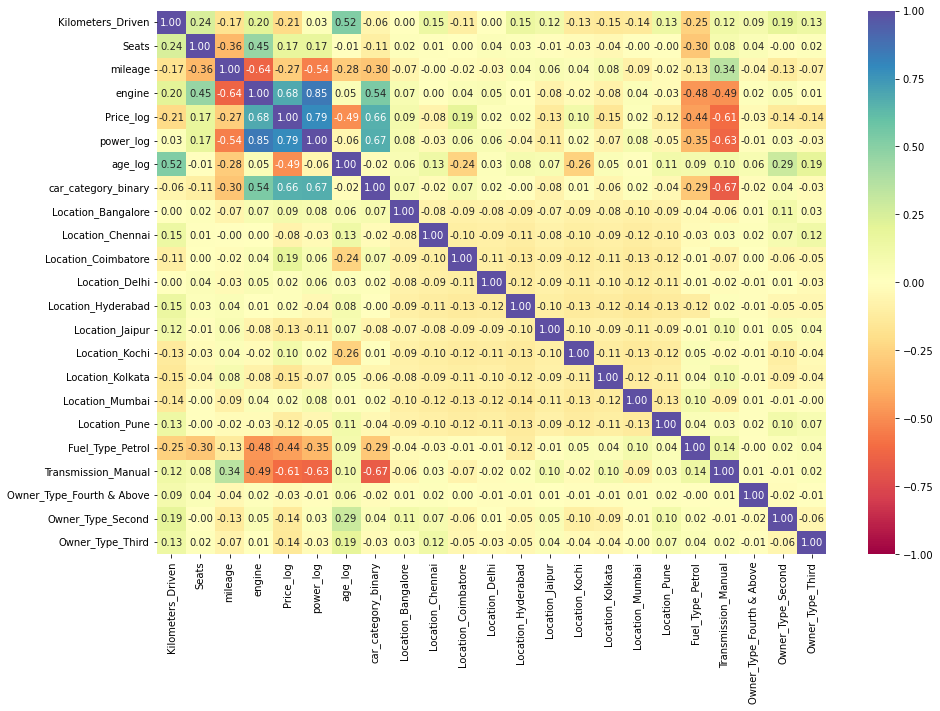

In [103]:
cols_list = df2.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))
sns.heatmap(
    df2[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [74]:
df2.columns

Index(['Kilometers_Driven', 'Seats', 'Price', 'mileage', 'engine', 'power',
       'age', 'car_category_binary', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third'],
      dtype='object')

In [75]:
# defining the dependent and independent variables
X = df2.drop(
    [
        "Price",
    ],
    axis=1,
)
y = df2["Price"]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #prevents data leakage

In [77]:
scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns) 
x_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns) 

In [78]:
x_test_scaled.sample(10)

,Kilometers_Driven,Seats,mileage,engine,power,age,car_category_binary,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
1512,-1.182722,-0.355186,1.072780,-1.040959,-0.846618,1.022395,-0.435500,-0.261195,-0.302419,-0.342376,-0.324593,-0.376875,-0.28209,-0.340622,-0.306655,2.607609,-0.334444,1.067843,0.633572,-0.043869,-0.441338,-0.141715
1093,-0.546755,-0.355186,0.087004,0.561888,1.367570,-1.131201,2.296212,-0.261195,-0.302419,2.920769,-0.324593,-0.376875,-0.28209,-0.340622,-0.306655,-0.383493,-0.334444,-0.936468,-1.578353,-0.043869,-0.441338,-0.141715
932,0.815562,2.114512,-1.288613,1.431061,-0.230975,-0.823545,-0.435500,-0.261195,3.306675,-0.342376,-0.324593,-0.376875,-0.28209,-0.340622,-0.306655,-0.383493,-0.334444,-0.936468,0.633572,-0.043869,-0.441338,-0.141715
797,0.584991,-0.355186,-1.335791,-0.223011,-0.241982,2.560678,-0.435500,-0.261195,-0.302419,-0.342376,-0.324593,-0.376875,-0.28209,-0.340622,-0.306655,2.607609,-0.334444,1.067843,0.633572,-0.043869,2.265838,-0.141715
437,-0.081104,-0.355186,0.864202,-0.214749,-0.177409,-0.515888,-0.435500,-0.261195,-0.302419,-0.342376,3.080777,-0.376875,-0.28209,-0.340622,-0.306655,-0.383493,-0.334444,-0.936468,-1.578353,-0.043869,2.265838,-0.141715
310,0.956467,-0.355186,0.586099,-0.049507,-0.175941,0.099425,-0.435500,-0.261195,-0.302419,-0.342376,-0.324593,-0.376875,-0.28209,-0.340622,-0.306655,-0.383493,2.990039,-0.936468,0.633572,-0.043869,-0.441338,-0.141715
1572,-1.336436,-0.355186,0.799643,-0.712127,-0.552005,-1.131201,-0.435500,-0.261195,-0.302419,-0.342376,-0.324593,-0.376875,-0.28209,-0.340622,-0.306655,2.607609,-0.334444,1.067843,0.633572,-0.043869,-0.441338,-0.141715
1193,0.558988,-0.355186,-0.094260,-0.378339,-0.847352,0.407082,-0.435500,-0.261195,-0.302419,-0.342376,-0.324593,-0.376875,-0.28209,2.935803,-0.306655,-0.383493,-0.334444,-0.936468,0.633572,-0.043869,-0.441338,-0.141715
623,0.203831,-0.355186,0.864202,-0.214749,-0.177409,-0.515888,-0.435500,-0.261195,-0.302419,-0.342376,-0.324593,-0.376875,-0.28209,2.935803,-0.306655,-0.383493,-0.334444,-0.936468,-1.578353,-0.043869,-0.441338,-0.141715
1301,-1.029007,-0.355186,-0.451821,0.910549,1.366836,-0.208231,2.296212,-0.261195,-0.302419,-0.342376,-0.324593,-0.376875,-0.28209,-0.340622,3.260993,-0.383493,-0.334444,-0.936468,-1.578353,-0.043869,-0.441338,-0.141715


In [79]:
import statsmodels.api as sm

x_train_scaled = sm.add_constant(x_train_scaled)
x_test_scaled = sm.add_constant(x_test_scaled)


In [80]:
print("Number of rows in train data =", x_train_scaled.shape[0])
print("Number of rows in test data =", x_test_scaled.shape[0])

Number of rows in train data = 4165
Number of rows in test data = 1785


In [81]:
x_train_scaled

,const,Kilometers_Driven,Seats,mileage,engine,power,age,car_category_binary,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,1.0,-0.670341,-0.355186,-0.424507,-0.710475,-0.720775,0.714738,-0.435500,-0.261195,-0.302419,-0.342376,-0.324593,-0.376875,-0.282090,-0.340622,3.260993,-0.383493,-0.334444,1.067843,0.633572,-0.043869,-0.441338,-0.141715
1,1.0,0.514103,-0.355186,1.941851,-0.214749,-0.267664,-0.515888,-0.435500,-0.261195,-0.302419,-0.342376,-0.324593,-0.376875,3.544965,-0.340622,-0.306655,-0.383493,-0.334444,-0.936468,0.633572,-0.043869,-0.441338,-0.141715
2,1.0,-0.655328,-0.355186,1.067813,0.606503,1.409028,-1.438858,2.296212,-0.261195,-0.302419,-0.342376,-0.324593,-0.376875,-0.282090,2.935803,-0.306655,-0.383493,-0.334444,-0.936468,-1.578353,-0.043869,-0.441338,-0.141715
3,1.0,0.434761,-0.355186,1.122441,-0.214749,-0.428362,-0.208231,-0.435500,-0.261195,-0.302419,-0.342376,3.080777,-0.376875,-0.282090,-0.340622,-0.306655,-0.383493,-0.334444,-0.936468,0.633572,-0.043869,-0.441338,-0.141715
4,1.0,-1.221150,-0.355186,-0.193582,-0.216401,0.075379,-0.208231,-0.435500,-0.261195,-0.302419,-0.342376,-0.324593,-0.376875,-0.282090,-0.340622,-0.306655,2.607609,-0.334444,1.067843,0.633572,-0.043869,-0.441338,-0.141715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4160,1.0,-0.038550,2.114512,-0.764687,-0.713780,-0.737285,0.407082,-0.435500,-0.261195,-0.302419,2.920769,-0.324593,-0.376875,-0.282090,-0.340622,-0.306655,-0.383493,-0.334444,1.067843,0.633572,-0.043869,-0.441338,-0.141715
4161,1.0,-0.621639,3.349361,-1.335791,1.431061,-0.205293,-1.131201,-0.435500,-0.261195,-0.302419,-0.342376,-0.324593,-0.376875,-0.282090,2.935803,-0.306655,-0.383493,-0.334444,-0.936468,0.633572,-0.043869,-0.441338,-0.141715
4162,1.0,-0.081104,-0.355186,1.122441,-0.214749,-0.428362,-0.208231,-0.435500,-0.261195,-0.302419,-0.342376,-0.324593,2.653402,-0.282090,-0.340622,-0.306655,-0.383493,-0.334444,-0.936468,0.633572,-0.043869,-0.441338,-0.141715
4163,1.0,-1.106889,-0.355186,0.104385,-0.712127,-0.575302,-1.438858,-0.435500,-0.261195,-0.302419,-0.342376,-0.324593,-0.376875,-0.282090,2.935803,-0.306655,-0.383493,-0.334444,1.067843,0.633572,-0.043869,-0.441338,-0.141715


### Check for Multicollinearity

* **Multicollinearity** occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent.  If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multi-collinearity, one such way is Variation Inflation Factor.

* **Variance  Inflation  factor**:  Variance  inflation  factors  measures  the  inflation  in  the variances of the regression parameter estimates due to collinearity that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βk is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if **VIF exceeds 5 or is close to exceeding 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.**

In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(x_train_scaled))

                      feature       VIF
0                       const  1.000000
1           Kilometers_Driven  1.909366
2                       Seats  1.951351
3                     mileage  3.625921
4                      engine  7.850036
5                   power_log  5.677715
6                     age_log  2.107319
7         car_category_binary  2.575591
8          Location_Bangalore  2.448265
9            Location_Chennai  2.905329
10        Location_Coimbatore  3.359721
11             Location_Delhi  2.996331
12         Location_Hyderabad  3.659909
13            Location_Jaipur  2.591992
14             Location_Kochi  3.485964
15           Location_Kolkata  3.110317
16            Location_Mumbai  3.772314
17              Location_Pune  3.291252
18           Fuel_Type_Petrol  2.669952
19        Transmission_Manual  2.148944
20  Owner_Type_Fourth & Above  1.022692
21          Owner_Type_Second  1.168525
22           Owner_Type_Third  1.096864


In [125]:
del x_train_scaled['engine']
del x_test_scaled['engine']

In [126]:
y_train

1933    1.147402
912     1.283708
2242    2.617396
1637    3.208421
763     0.916291
          ...   
923     2.384165
5306    1.887070
4068    3.111291
240     0.974560
5270    1.728109
Name: Price_log, Length: 4118, dtype: float64

In [127]:
x_train_scaled

,const,Kilometers_Driven,Seats,mileage,power_log,age_log,car_category_binary,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,1.0,-0.642229,-0.347725,0.541225,0.039895,0.804842,-0.433325,-0.256926,-0.299991,-0.339238,-0.313262,-0.374284,-0.271135,-0.349824,3.113857,-0.382670,-0.337009,-0.931436,0.625849,-0.044119,-0.44591,-0.140754
1,1.0,-0.003618,2.204736,-0.803196,-0.826934,0.556270,-0.433325,-0.256926,-0.299991,2.947781,-0.313262,-0.374284,-0.271135,-0.349824,-0.321145,-0.382670,-0.337009,1.073611,0.625849,-0.044119,-0.44591,-0.140754
2,1.0,1.568926,2.204736,-1.015734,1.330903,1.031771,-0.433325,-0.256926,-0.299991,-0.339238,-0.313262,2.671767,-0.271135,-0.349824,-0.321145,-0.382670,-0.337009,-0.931436,0.625849,-0.044119,-0.44591,-0.140754
3,1.0,0.336369,-0.347725,-0.306453,1.328489,-0.775983,2.307738,-0.256926,-0.299991,2.947781,-0.313262,-0.374284,-0.271135,-0.349824,-0.321145,-0.382670,-0.337009,-0.931436,-1.597831,-0.044119,-0.44591,-0.140754
4,1.0,-0.244221,-0.347725,-0.580774,-0.308561,0.804842,-0.433325,-0.256926,-0.299991,-0.339238,-0.313262,-0.374284,3.688202,-0.349824,-0.321145,-0.382670,-0.337009,1.073611,0.625849,-0.044119,-0.44591,-0.140754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4113,1.0,0.537054,2.204736,-1.692887,1.280734,0.804842,-0.433325,-0.256926,-0.299991,-0.339238,3.192212,-0.374284,-0.271135,-0.349824,-0.321145,-0.382670,-0.337009,-0.931436,0.625849,-0.044119,-0.44591,-0.140754
4114,1.0,-1.290834,-0.347725,0.753762,-0.506067,-1.833451,-0.433325,-0.256926,-0.299991,-0.339238,3.192212,-0.374284,-0.271135,-0.349824,-0.321145,-0.382670,-0.337009,1.073611,0.625849,-0.044119,-0.44591,-0.140754
4115,1.0,0.103078,-0.347725,1.020669,1.541617,-0.025697,2.307738,-0.256926,-0.299991,2.947781,-0.313262,-0.374284,-0.271135,-0.349824,-0.321145,-0.382670,-0.337009,-0.931436,-1.597831,-0.044119,-0.44591,-0.140754
4116,1.0,0.507572,-0.347725,1.752192,-1.413613,0.281485,-0.433325,-0.256926,-0.299991,-0.339238,-0.313262,-0.374284,-0.271135,-0.349824,-0.321145,2.613216,-0.337009,-0.931436,0.625849,-0.044119,-0.44591,-0.140754


In [128]:
y_train.index = x_train_scaled.index
y_test.index = x_test_scaled.index

In [135]:
# create the model
model1 = sm.OLS(y_train, x_train_scaled).fit()

# get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_log   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     2102.
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        10:22:10   Log-Likelihood:                -469.32
No. Observations:                4118   AIC:                             976.6
Df Residuals:                    4099   BIC:                             1097.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.8089      0.004    427.064      0.000       1.801       1.817
Kilometers_Driven      -0.0518      0.006     -8.924      0.000      -0.063      -0.040
Seats                   0.0536      0.006      9.602      0.000       0.043       0.065
mileage                -0.0437      0.007     -6.060      0.000      -0.058      -0.030
power_log               0.4089      0.008     52.616      0.000       0.394       0.424
age_log                -0.3571      0.006    -59.380      0.000      -0.369      -0.345
car_category_binary     0.1985      0.007     29.234      0.000       0.185       0.212
Location_Bangalore      0.0277      0.005      5.898      0.000       0.019       0.037
Location_Delhi         -0.0201      0.005     -4.172      0.000      -0.030      -0.011
Location_Hyderabad      0.0316      0.005      6.310      0.000       0.022       0.041
Location_Jaipur        -0.0205      0.005     -4.341      0.000      -0.030      -0.011
Location_Kochi         -0.0329      0.005     -6.627      0.000      -0.043      -0.023
Location_Kolkata       -0.0783      0.005    -15.669      0.000      -0.088      -0.068
Location_Mumbai        -0.0347      0.005     -6.834      0.000      -0.045      -0.025
Location_Pune          -0.0287      0.005     -5.852      0.000      -0.038      -0.019
Fuel_Type_Petrol       -0.1331      0.006    -21.480      0.000      -0.145      -0.121
Transmission_Manual    -0.0597      0.006     -9.627      0.000      -0.072      -0.048
Owner_Type_Second      -0.0412      0.005     -9.017      0.000      -0.050      -0.032
Owner_Type_Third       -0.0314      0.004     -7.123      0.000      -0.040      -0.023
==============================================================================
Omnibus:                     1012.529   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18081.118
Skew:                          -0.702   Prob(JB):                         0.00
Kurtosis:                      13.169   Cond. No.                         4.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
model1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,1.8089,0.004,427.064,0.000,1.801,1.817
Kilometers_Driven,-0.0518,0.006,-8.924,0.000,-0.063,-0.040
Seats,0.0536,0.006,9.602,0.000,0.043,0.065
mileage,-0.0437,0.007,-6.060,0.000,-0.058,-0.030
power_log,0.4089,0.008,52.616,0.000,0.394,0.424
age_log,-0.3571,0.006,-59.380,0.000,-0.369,-0.345
car_category_binary,0.1985,0.007,29.234,0.000,0.185,0.212
Location_Bangalore,0.0277,0.005,5.898,0.000,0.019,0.037
Location_Delhi,-0.0201,0.005,-4.172,0.000,-0.030,-0.011
Location_Hyderabad,0.0316,0.005,6.310,0.000,0.022,0.041


In [134]:
del x_train_scaled["Location_Coimbatore"]
del x_test_scaled["Location_Coimbatore"]

In [147]:
coef = model1.params

In [148]:
coef

const                  1.808890
Kilometers_Driven     -0.051807
Seats                  0.053626
mileage               -0.043664
power_log              0.408872
age_log               -0.357066
car_category_binary    0.198505
Location_Bangalore     0.027725
Location_Delhi        -0.020115
Location_Hyderabad     0.031642
Location_Jaipur       -0.020514
Location_Kochi        -0.032945
Location_Kolkata      -0.078296
Location_Mumbai       -0.034734
Location_Pune         -0.028724
Fuel_Type_Petrol      -0.133128
Transmission_Manual   -0.059717
Owner_Type_Second     -0.041211
Owner_Type_Third      -0.031433
dtype: float64

In [149]:
# Let us write the equation of the fit
Equation = "log(Price) ="
print(Equation, end="\t")
for i in range(len(coef)):
    print("(", coef[i], ") * ", coef.index[i], "+", end=" ")

log(Price) =	( 1.8088895702322714 ) *  const + ( -0.051806572204896525 ) *  Kilometers_Driven + ( 0.05362623913097328 ) *  Seats + ( -0.04366351603413146 ) *  mileage + ( 0.40887167949176506 ) *  power_log + ( -0.35706612960198525 ) *  age_log + ( 0.1985047996793805 ) *  car_category_binary + ( 0.027724872082763603 ) *  Location_Bangalore + ( -0.020115377976352683 ) *  Location_Delhi + ( 0.031642117084472975 ) *  Location_Hyderabad + ( -0.02051358680261431 ) *  Location_Jaipur + ( -0.03294534672181264 ) *  Location_Kochi + ( -0.07829645093833365 ) *  Location_Kolkata + ( -0.034733571751401265 ) *  Location_Mumbai + ( -0.02872364410633694 ) *  Location_Pune + ( -0.13312842855776155 ) *  Fuel_Type_Petrol + ( -0.05971695478441719 ) *  Transmission_Manual + ( -0.04121144653618277 ) *  Owner_Type_Second + ( -0.03143324456431859 ) *  Owner_Type_Third + 

In [150]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # computing the actual prices by using the exponential function
    target = np.exp(target)
    pred = np.exp(pred)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [151]:
features = X_train.columns

In [152]:
# Checking model performance on train set
print("Train Performance:")
lin_reg_model_perf_train = model_performance_regression(model1, x_train_scaled, y_train)
lin_reg_model_perf_train

Train Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4.219386,1.892029,0.848963,0.848263,21.733954


In [153]:
# Checking model performance on test set
print("Test Performance:")
lin_reg_model_perf_test = model_performance_regression(model1, x_test_scaled, y_test)
lin_reg_model_perf_test

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.826706,1.908917,0.857009,0.855452,21.930931


In [154]:
import pickle

In [155]:
pickle.dump(model1, open("predictusedcarprice.model", "wb"))

In [156]:
model = pickle.load(open("predictusedcarprice.model", "rb"))

In [159]:
x_test_scaled['prediction'] = np.exp(model1.predict(x_test_scaled))

In [163]:
int(np.mean(model1.resid))

0

In [160]:
x_test_scaled

,const,Kilometers_Driven,Seats,mileage,power_log,age_log,car_category_binary,Location_Bangalore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Owner_Type_Third,prediction
0,1.0,1.554185,-0.347725,1.752192,-1.413613,0.804842,-0.433325,-0.256926,-0.313262,-0.374284,-0.271135,-0.349824,-0.321145,-0.38267,-0.337009,-0.931436,0.625849,-0.44591,7.104576,1.851609
1,1.0,-1.075615,-0.347725,-0.086501,0.347420,-1.833451,-0.433325,-0.256926,-0.313262,-0.374284,-0.271135,-0.349824,-0.321145,-0.38267,-0.337009,1.073611,-1.597831,-0.44591,-0.140754,13.306708
2,1.0,0.408011,-0.347725,-0.818025,0.039895,-0.373952,-0.433325,-0.256926,-0.313262,-0.374284,-0.271135,-0.349824,3.113857,-0.38267,-0.337009,1.073611,0.625849,-0.44591,-0.140754,4.458140
3,1.0,0.223276,-0.347725,1.413616,-1.035608,0.804842,-0.433325,3.892174,-0.313262,-0.374284,-0.271135,-0.349824,-0.321145,-0.38267,-0.337009,1.073611,0.625849,-0.44591,-0.140754,2.534997
4,1.0,1.280002,2.204736,-1.727486,1.287963,-0.775983,-0.433325,-0.256926,-0.313262,-0.374284,-0.271135,-0.349824,-0.321145,-0.38267,-0.337009,-0.931436,-1.597831,-0.44591,-0.140754,19.080485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760,1.0,-0.170516,-0.347725,0.877330,-0.308561,0.556270,-0.433325,-0.256926,-0.313262,-0.374284,3.688202,-0.349824,-0.321145,-0.38267,-0.337009,-0.931436,0.625849,-0.44591,-0.140754,4.181670
1761,1.0,-1.054978,-0.347725,0.160635,-0.344588,-0.775983,-0.433325,-0.256926,-0.313262,-0.374284,-0.271135,-0.349824,-0.321145,-0.38267,2.967282,1.073611,-1.597831,-0.44591,-0.140754,6.177839
1762,1.0,1.437584,2.204736,-1.075046,0.232935,-0.775983,-0.433325,-0.256926,-0.313262,2.671767,-0.271135,-0.349824,-0.321145,-0.38267,-0.337009,-0.931436,0.625849,-0.44591,-0.140754,11.521739
1763,1.0,-0.258962,-0.347725,1.841162,-0.082588,-0.373952,-0.433325,-0.256926,3.192212,-0.374284,-0.271135,-0.349824,-0.321145,-0.38267,-0.337009,-0.931436,0.625849,-0.44591,-0.140754,6.224290


* Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) of train and test data are close, which indicates that our model is not overfitting the train data.

* MAE indicates that our current model is able to predict used car prices within a mean error of 1.3 lakhs on test data.

* The units of both RMSE and MAE are the same, Lakhs in this case. But RMSE is greater than MAE because it penalizes the outliers more.

* MAPE of 12.97 on the test data indicates that the model can predict within 13% of the used car price.